# Visualización de datos

## **¿Qué hacen los gráficos?**
- Nos ayudan a tomar una decisión
- Explica conceptos
- La mayoría de los humanos no son naturalmente numéricos

#### **Matplotlib**

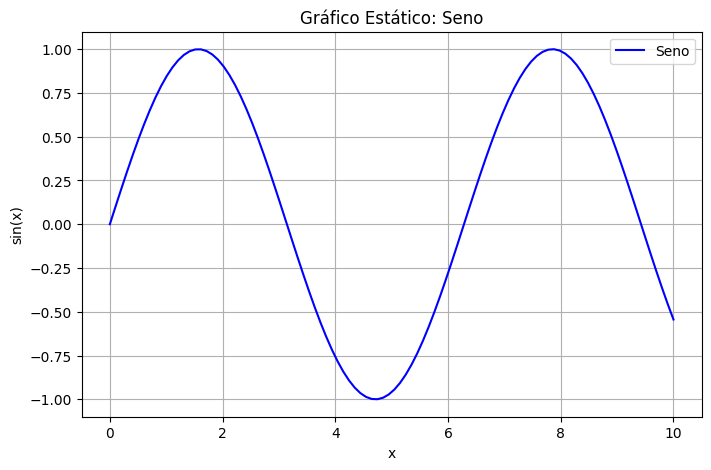

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Seno', color='blue')
plt.title('Gráfico Estático: Seno')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

#### **Seaborn**

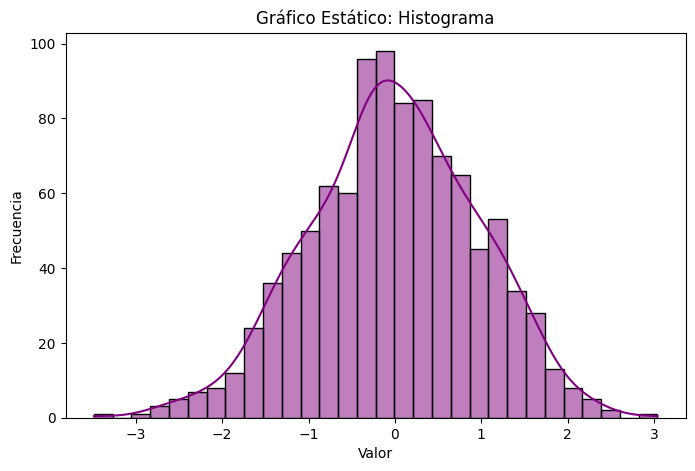

In [2]:
import seaborn as sns
import pandas as pd

# Datos simulados
data = np.random.normal(size=1000)

# Crear gráfico
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color='purple')
plt.title('Gráfico Estático: Histograma')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

#### **Plotly**

In [4]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 5.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import plotly.express as px
import pandas as pd

# Datos simulados
df = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'size': np.random.rand(100) * 50,
    'color': np.random.choice(['A', 'B', 'C'], 100)
})

# Crear gráfico interactivo
fig = px.scatter(
    df, x='x', y='y', size='size', color='color',
    title='Gráfico Interactivo: Dispersión',
    labels={'x': 'Eje X', 'y': 'Eje Y'},
    template='plotly_dark'
)

fig.update_layout(width=800, height=500)
fig.show()

In [8]:
# Datos
data = pd.DataFrame({
    'Categoría': ['A', 'B', 'C', 'D', 'E'],
    'Valor': [10, 15, 7, 12, 9]
})

# Crear gráfico interactivo con ajustes de tamaño
fig = px.bar(
    data, x='Categoría', y='Valor',
    title='Gráfico Interactivo: Barras',
    labels={'Valor': 'Frecuencia', 'Categoría': 'Categorías'},
    template='ggplot2'
)

# Ajustar tamaño
fig.update_layout(width=800, height=500)
fig.show()


### **Vamos a la cancha**

> [*"El Perú es uno de los países menos honestos, según estudio internacional"*](https://elcomercio.pe/economia/peru/investigadores-pierden-17-000-carteras-mundo-son-devueltas-noticia-647885-noticia/)

Un estudio realizado por el equipo de investigadores, de universidades de Zurich, Michigan y Utah publicado en la revista Science, puso a prueba el civismo de miles de personas a las que confiaron billeteras "perdidas". El experimento consistió en "perder" 17.000 carteras (en 355 ciudades) y decir a un empleado del local haber encontrado la cartera en el suelo y que por motivos de tiempo, les pedían ocuparse del asunto.

La honestidad ha sido muy estudiada por psicólogos y economistas, pero poco en la vida real y jamás, en 40 países a la vez. Los resultados muestran marcadas diferencias entre los países participantes: con Suiza y los países escandinavos entre los más honestos del listado, mientras que el que Perú, Marruecos y China, se encuentran en los últimos tres lugares.

<img src="https://www.science.org/cms/10.1126/science.aau8712/asset/c1097eeb-12c3-41cb-98f7-26f4ab47ebeb/assets/graphic/365_70_f1.jpeg" width="600">

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datos
civic_raw = pd.read_csv("data/civic_data.csv")

# Previsualizar las columnas relevantes
civic_raw[["country", "Country", "cond", "age", "response", "male", "computer"]].head()


,country,Country,cond,age,response,male,computer
0,38,UAE,0,5.0,0,1.0,1.0
1,38,UAE,0,4.0,0,1.0,1.0
2,38,UAE,1,3.0,0,1.0,1.0
3,38,UAE,0,2.0,0,0.0,1.0
4,38,UAE,1,3.0,0,0.0,1.0


In [10]:
# Filtrar y agrupar los datos según las condiciones
civic = (civic_raw[civic_raw['cond'].isin([0, 1])]
         .groupby(['Country', 'cond'], as_index=False)
         .agg(reported=('response', 'mean')))

# Ver los datos procesados
civic.head()


,Country,cond,reported
0,Argentina,0,46.000000
1,Argentina,1,49.000000
2,Australia,0,52.261307
3,Australia,1,69.000000
4,Brazil,0,34.000000


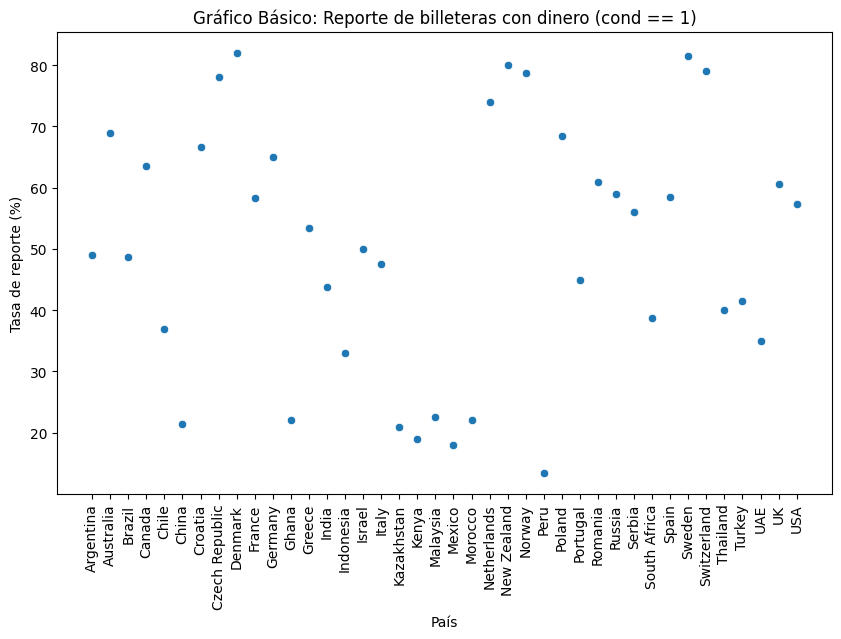

In [11]:
# Filtrar para el gráfico (cond == 1) y gráfico básico
civic_cond_1 = civic[civic['cond'] == 1]

# Gráfico básico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=civic_cond_1, x='Country', y='reported')
plt.title('Gráfico Básico: Reporte de billeteras con dinero (cond == 1)')
plt.xlabel('País')
plt.ylabel('Tasa de reporte (%)')
plt.xticks(rotation=90)
plt.show()


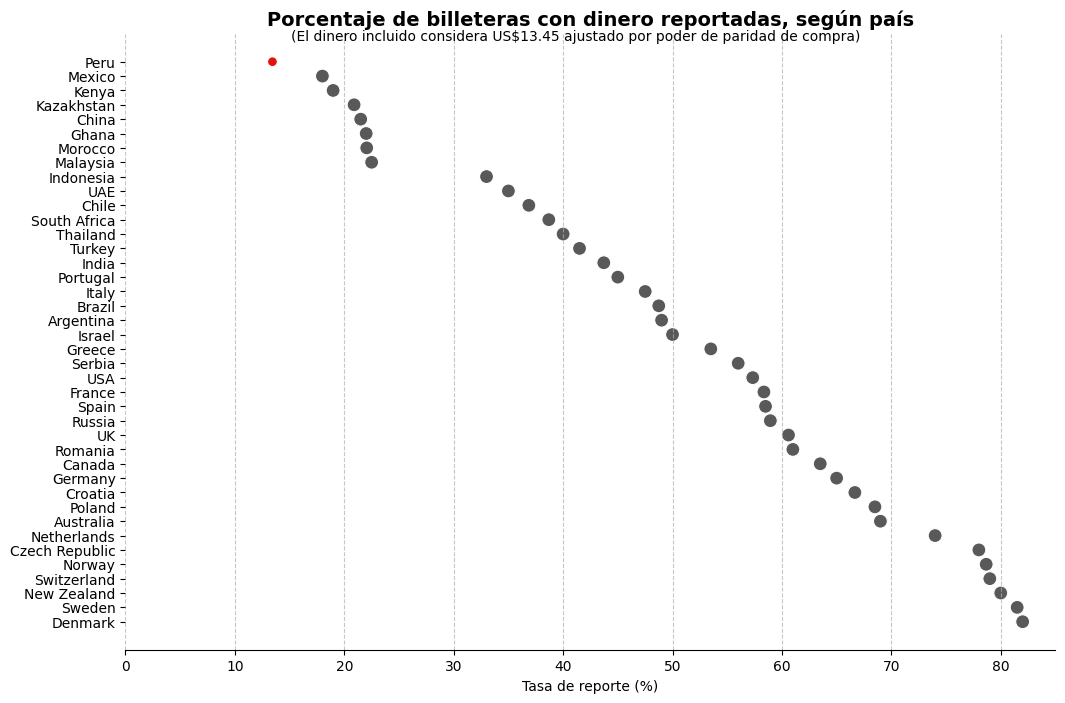

In [22]:
# Gráfico sofisticado
plt.figure(figsize=(12, 8))
sorted_data = civic_cond_1.sort_values(by='reported', ascending=True)

sns.scatterplot(
    data=sorted_data,
    x='reported',
    y=pd.Categorical(sorted_data['Country'], categories=sorted_data['Country']),
    hue=sorted_data['Country'] != 'Peru',
    size=sorted_data['Country'] != 'Peru',
    sizes=(100, 50),
    palette={True: "#595959", False: "#E3120B"}
)

# # Añadir etiquetas al lado de los puntos
# for index, row in sorted_data.iterrows():
#     plt.text(row['reported'] + 1, row['Country'], row['Country'],
#              color="#E3120B" if row['Country'] == 'Peru' else "#595959",
#              fontsize=8, va='center')

# Ajustes finales
plt.title("Porcentaje de billeteras con dinero reportadas, según país", fontsize=14, weight='bold')
plt.suptitle("(El dinero incluido considera US$13.45 ajustado por poder de paridad de compra)", fontsize=10, y=0.885)
plt.xlabel("Tasa de reporte (%)")
plt.ylabel(None)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 85)
plt.xticks(range(0, 90, 10))
plt.legend([], [], frameon=False)  # Ocultar leyenda
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
